<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01104776/blob/main/Repaso_Tranformaci%C3%B3n_Reduccion_dimensiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Actividad Semanal -- 5 Repaso Transformación y reducción de dimensiones**

**Andrea Margarita Osorio González** 


**A01104776**

**Ciencia y Analítica de datos**


**Orlando Figón Cruz**


**27/10/2022**

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [ ]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
#B= 
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [ ]:
#Matriz 1

In [ ]:
#Matriz 2

In [ ]:
#Matriz 3

**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


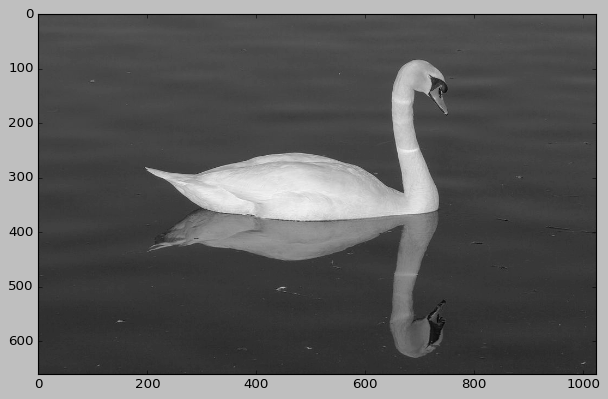

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F0F2EEE4310>


In [ ]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [ ]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [ ]:
U.shape

(660, 660)

In [ ]:
V.shape

(1024, 1024)

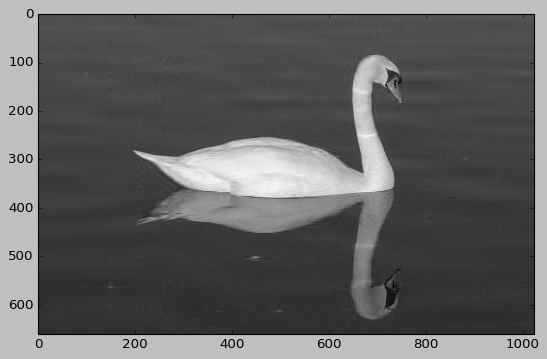

In [ ]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

In [ ]:
#imagen 1


[ 44.  44.  43. ... 230. 230. 230.]


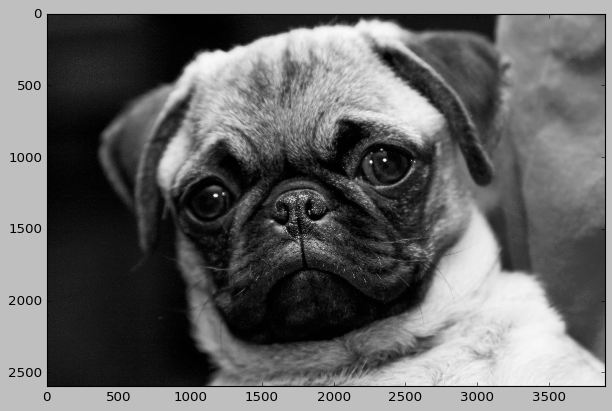

<PIL.Image.Image image mode=LA size=3888x2592 at 0x7F428BD245D0>


In [42]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://th.bing.com/th/id/R.df9d251a22a77ad3bc7c0bf075e60535?rik=JD%2bgrH2ExOpgXA&riu=http%3a%2f%2fwww.dog-learn.com%2fdog-breeds%2fpug%2fimages%2fpug-u9.jpg&ehk=Cw6rzG5wG6taDG91ejcGHjRsYEvM2tH%2foOq7AAxsSno%3d&risl=&pid=ImgRaw&r=0')).convert('LA')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [4]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(2592, 3888)

In [5]:
U.shape

(2592, 2592)

In [6]:
V.shape

(3888, 3888)

In [15]:
nvalue = 45

In [53]:
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

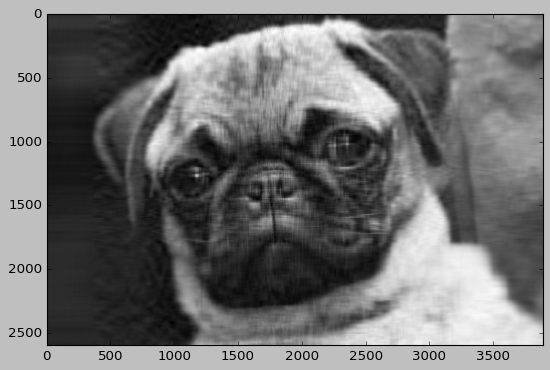

Felicidades la imagen está comprimida


In [54]:
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

In [18]:
#imagen 2

[114. 114. 113. ...  37.  43.  45.]


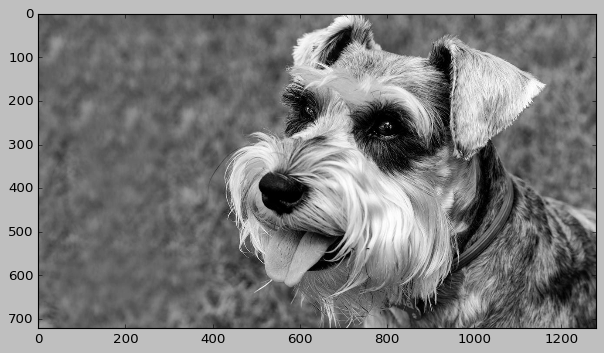

<PIL.Image.Image image mode=LA size=1280x720 at 0x7F428BBFB050>


In [39]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://www.hogarmania.com/archivos/202011/schnauzer-enano-1-XxXx80.jpg')).convert('LA')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [20]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(720, 1280)

In [21]:
U.shape

(720, 720)

In [22]:
V.shape

(1280, 1280)

In [33]:
nvalue = 60

In [34]:
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

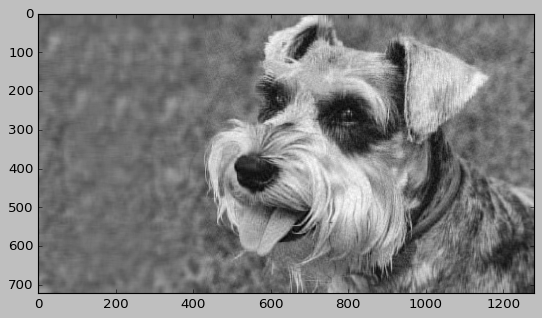

Felicidades la imagen está comprimida


In [35]:
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

In [ ]:
#imagen 3

[ 71.  70.  70. ... 174. 183. 194.]


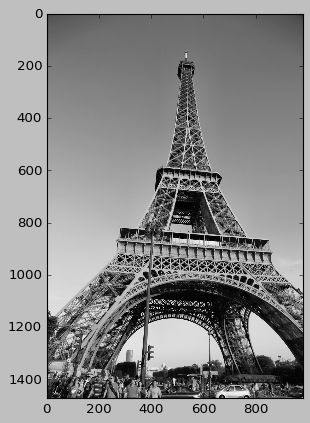

<PIL.Image.Image image mode=LA size=980x1470 at 0x7F428BFCD690>


In [56]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://th.bing.com/th/id/R.f8762b67f4001024584d6b75a2bf9890?rik=SxSuvyp9GH8E4w&riu=http%3a%2f%2f3.bp.blogspot.com%2f-dkcjoHxMzpk%2fUSdazcz8aYI%2fAAAAAAAAAIU%2fv_4O5FbvXk4%2fs1600%2f80_torre-eiffel-de-paris.jpg&ehk=5ojmXLkLX%2bBTCAg6SNe3fgPygHoWhyDpXZyOoRCSssM%3d&risl=&pid=ImgRaw&r=0')).convert('LA')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [57]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(1470, 980)

In [58]:
U.shape

(1470, 1470)

In [59]:
V.shape

(980, 980)

In [63]:
nvalue = 60

In [64]:
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

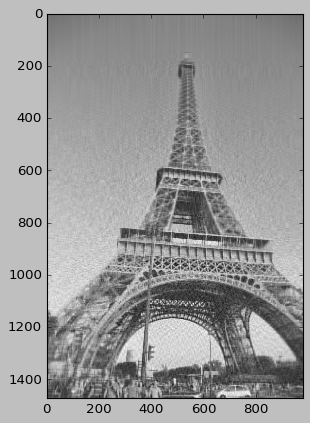

Felicidades la imagen está comprimida


In [65]:
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




In [66]:
#tu codigo aqui
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')

iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

pca = PCA(n_components=2)
X_new = pca.fit_transform(X) 

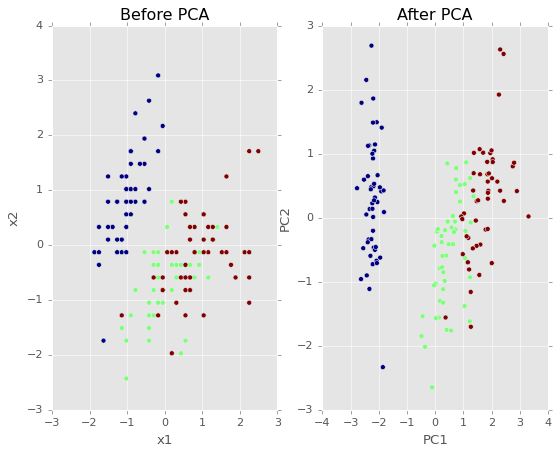

In [67]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [68]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [69]:
np.cov(X_new.T)

array([[2.93808505e+00, 5.33928780e-16],
       [5.33928780e-16, 9.20164904e-01]])

In [70]:
pca.explained_variance_

array([2.93808505, 0.9201649 ])

In [71]:
print(abs( pca.components_ ))

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


The biplot

In [73]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] 
    ys = score[:,1]
    n = coeff.shape[0]
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s])
    for i in range(n):
     
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

In [74]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

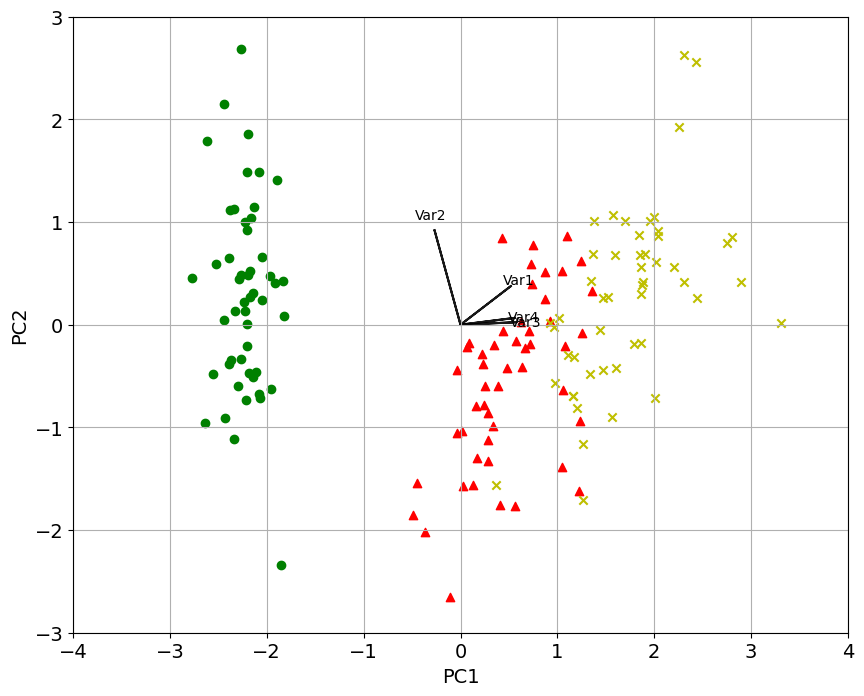

In [75]:
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

In [76]:
np.corrcoef(X[:,2], X[:,3])[1,0]

0.9628654314027957

In [77]:
np.corrcoef(X[:,1], X[:,2])[1,0]

-0.42844010433054014

**Describe lo relevante del ejercicio y que descubriste de las variables análizadas.**

Para mí lo relevante del ejercicio fue conocer nuevas técnicas que nos permitan trabajar con una mejor estrategía de cómo analizar y utilizar los datos.

De las variables descubrí que las flechas que apuntan a la misma direccion indcian correlación entre variables, mientras que las que apuntan a lados contrarios indican contraste entre las variables.

**¿Qué es feature importance y para que nos sirve?**

Feature importance es la asignación de un valor a los features que presentan mayor relevancia  y nos permite una mejor interpretación de datos. reflejados por la magnitud del valor correspondiente, a mayor magnitud, mayor importancia y viceversa.

Con esta técnica es posible distinguir los qué features son los más relevantes e irrelevantes.







**¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?**

El uso del feature importance después de haber realizado el análisis de PCA y que entre mayor sean los valores absolutos, es mayor la contribución de un feature específico al componente princial al ser sorteados por la varianza.

Adicional a esto para mí lo más relevante es el poder visualizar de una manera gráfica el comportamiento de los datos con y sin el analisis de PCA ya que así es mejor la comprensión de los datos y cómo se están relacionando entre sí para al final trabajar con datos filtrados y limpios que generen relevancia al ejercicio y o modelo de estudio.



**¿Dónde lo aplicarías o te sería de utilidad este conocimiento?**

En situaciones dónde se requiera un modelo predictivo para poder entender mejor los datos, entender el modelo y reduciendo y/o seleccionando el número de features a mantener para poder tener una visión de lo realmente relevante y poder desechar los datos irrelevantes que puedan causar ruido y o informacíon innecesaria. 